In [436]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE



In [437]:
#  Carregar e filtrar os dados:


url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
df = pd.read_csv(url)

# Filtrar os dados do Brasil
br_data = df[df["location"] == "Brazil"].copy()

In [438]:
br_data.columns


Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [439]:
br_data.rename(columns={
    'iso_code': 'codigo_iso',
    'continent': 'continente',
    'location': 'localizacao',
    'date': 'data',
    'total_cases': 'casos_totais',
    'new_cases': 'novos_casos',
    'new_cases_smoothed': 'novos_casos_suavizados',
    'total_deaths': 'mortes_totais',
    'new_deaths': 'novas_mortes',
    'new_deaths_smoothed': 'novas_mortes_suavizadas',
    'total_cases_per_million': 'casos_totais_por_milhao',
    'new_cases_per_million': 'novos_casos_por_milhao',
    'new_cases_smoothed_per_million': 'novos_casos_suavizados_por_milhao',
    'total_deaths_per_million': 'mortes_totais_por_milhao',
    'new_deaths_per_million': 'novas_mortes_por_milhao',
    'new_deaths_smoothed_per_million': 'novas_mortes_suavizadas_por_milhao',
    'reproduction_rate': 'taxa_reproducao',
    'icu_patients': 'pacientes_uti',
    'icu_patients_per_million': 'pacientes_uti_por_milhao',
    'hosp_patients': 'pacientes_internados',
    'hosp_patients_per_million': 'pacientes_internados_por_milhao',
    'weekly_icu_admissions': 'admissoes_uti_semanais',
    'weekly_icu_admissions_per_million': 'admissoes_uti_semanais_por_milhao',
    'weekly_hosp_admissions': 'admissoes_hospitalares_semanais',
    'weekly_hosp_admissions_per_million': 'admissoes_hospitalares_semanais_por_milhao',
    'total_tests': 'testes_totais',
    'new_tests': 'novos_testes',
    'total_tests_per_thousand': 'testes_totais_por_mil',
    'new_tests_per_thousand': 'novos_testes_por_mil',
    'new_tests_smoothed': 'novos_testes_suavizados',
    'new_tests_smoothed_per_thousand': 'novos_testes_suavizados_por_mil',
    'positive_rate': 'taxa_positividade',
    'tests_per_case': 'testes_por_caso',
    'tests_units': 'unidades_testes',
    'total_vaccinations': 'vacinacoes_totais',
    'people_vaccinated': 'pessoas_vacinadas',
    'people_fully_vaccinated': 'pessoas_totalmente_vacinadas',
    'total_boosters': 'reforcos_totais',
    'new_vaccinations': 'novas_vacinacoes',
    'new_vaccinations_smoothed': 'novas_vacinacoes_suavizadas',
    'total_vaccinations_per_hundred': 'vacinacoes_totais_por_cem',
    'people_vaccinated_per_hundred': 'pessoas_vacinadas_por_cem',
    'people_fully_vaccinated_per_hundred': 'pessoas_totalmente_vacinadas_por_cem',
    'total_boosters_per_hundred': 'reforcos_totais_por_cem',
    'new_vaccinations_smoothed_per_million': 'novas_vacinacoes_suavizadas_por_milhao',
    'new_people_vaccinated_smoothed': 'novas_pessoas_vacinadas_suavizadas',
    'new_people_vaccinated_smoothed_per_hundred': 'novas_pessoas_vacinadas_suavizadas_por_cem',
    'stringency_index': 'indice_rigor',
    'population_density': 'densidade_populacional',
    'median_age': 'idade_media',
    'aged_65_older': 'populacao_65_anos_ou_mais',
    'aged_70_older': 'populacao_70_anos_ou_mais',
    'gdp_per_capita': 'pib_per_capita',
    'extreme_poverty': 'pobreza_extrema',
    'cardiovasc_death_rate': 'taxa_mortalidade_cardiovascular',
    'diabetes_prevalence': 'prevalencia_diabetes',
    'female_smokers': 'fumantes_mulheres',
    'male_smokers': 'fumantes_homens',
    'handwashing_facilities': 'instalacoes_lavagem_maos',
    'hospital_beds_per_thousand': 'leitos_hospitalares_por_mil',
    'life_expectancy': 'expectativa_vida',
    'human_development_index': 'indice_desenvolvimento_humano',
    'population': 'populacao',
    'excess_mortality_cumulative_absolute': 'mortalidade_excessiva_acumulada_absoluta',
    'excess_mortality_cumulative': 'mortalidade_excessiva_acumulada',
    'excess_mortality': 'mortalidade_excessiva',
    'excess_mortality_cumulative_per_million': 'mortalidade_excessiva_acumulada_por_milhao'
}, inplace=True)



In [440]:
# Aqui, convertemos a coluna 'date' para o formato datetime, o que facilita o trabalho com datas.

br_data["date"] = pd.to_datetime(br_data["data"])

In [441]:
#Salvar o dataframe original
data_original = br_data

In [442]:
br_data = br_data.fillna(method='ffill').fillna(method='bfill')




In [443]:


br_data.head()

,codigo_iso,continente,localizacao,data,casos_totais,novos_casos,novos_casos_suavizados,mortes_totais,novas_mortes,novas_mortes_suavizadas,...,instalacoes_lavagem_maos,leitos_hospitalares_por_mil,expectativa_vida,indice_desenvolvimento_humano,populacao,mortalidade_excessiva_acumulada_absoluta,mortalidade_excessiva_acumulada,mortalidade_excessiva,mortalidade_excessiva_acumulada_por_milhao,date
35883,BRA,South America,Brazil,2020-01-03,1.0,0.0,0.0,1.0,0.0,0.0,...,NaN,2.2,75.88,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-03
35884,BRA,South America,Brazil,2020-01-04,1.0,0.0,0.0,1.0,0.0,0.0,...,NaN,2.2,75.88,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-04
35885,BRA,South America,Brazil,2020-01-05,1.0,0.0,0.0,1.0,0.0,0.0,...,NaN,2.2,75.88,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-05
35886,BRA,South America,Brazil,2020-01-06,1.0,0.0,0.0,1.0,0.0,0.0,...,NaN,2.2,75.88,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-06
35887,BRA,South America,Brazil,2020-01-07,1.0,0.0,0.0,1.0,0.0,0.0,...,NaN,2.2,75.88,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-07


In [444]:
br_data.columns

Index(['codigo_iso', 'continente', 'localizacao', 'data', 'casos_totais',
       'novos_casos', 'novos_casos_suavizados', 'mortes_totais',
       'novas_mortes', 'novas_mortes_suavizadas', 'casos_totais_por_milhao',
       'novos_casos_por_milhao', 'novos_casos_suavizados_por_milhao',
       'mortes_totais_por_milhao', 'novas_mortes_por_milhao',
       'novas_mortes_suavizadas_por_milhao', 'taxa_reproducao',
       'pacientes_uti', 'pacientes_uti_por_milhao', 'pacientes_internados',
       'pacientes_internados_por_milhao', 'admissoes_uti_semanais',
       'admissoes_uti_semanais_por_milhao', 'admissoes_hospitalares_semanais',
       'admissoes_hospitalares_semanais_por_milhao', 'testes_totais',
       'novos_testes', 'testes_totais_por_mil', 'novos_testes_por_mil',
       'novos_testes_suavizados', 'novos_testes_suavizados_por_mil',
       'taxa_positividade', 'testes_por_caso', 'unidades_testes',
       'vacinacoes_totais', 'pessoas_vacinadas',
       'pessoas_totalmente_vacinadas', 

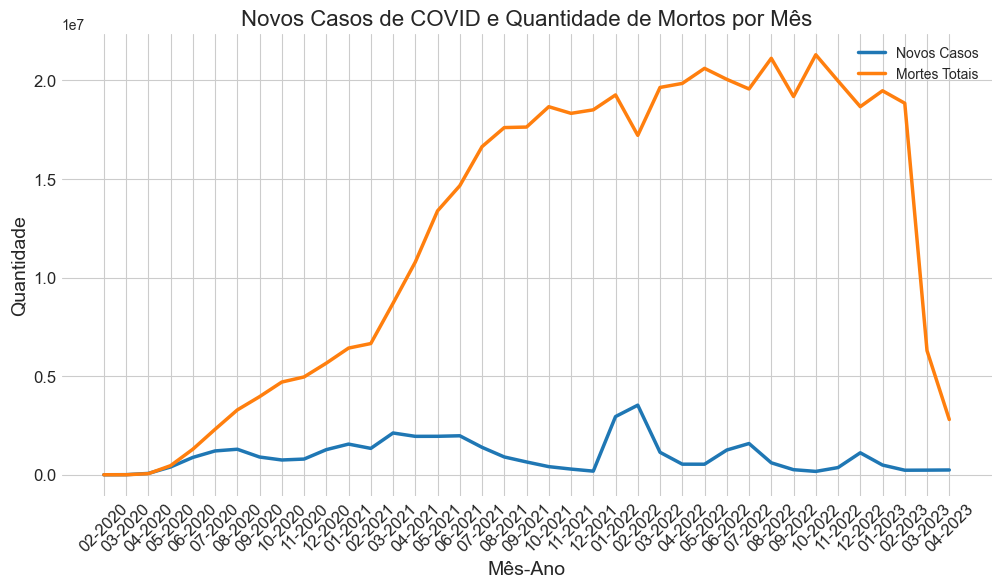

In [445]:
# Formatar a coluna "mes_ano" para o formato "MM-AAAA"
br_data_grouped['mes_ano'] = br_data_grouped['mes_ano'].dt.strftime('%m-%Y')

# Análise de tendências temporais
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='mes_ano', y="novos_casos", data=br_data_grouped, linewidth=2.5, label="Novos Casos")
sns.lineplot(x='mes_ano', y="mortes_totais", data=br_data_grouped, linewidth=2.5, label="Mortes Totais")
plt.title("Novos Casos de COVID e Quantidade de Mortos por Mês", fontsize=16)
plt.xlabel('Mês-Ano', fontsize=14)
plt.ylabel("Quantidade", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
ax.legend()
plt.grid(True)
plt.show()


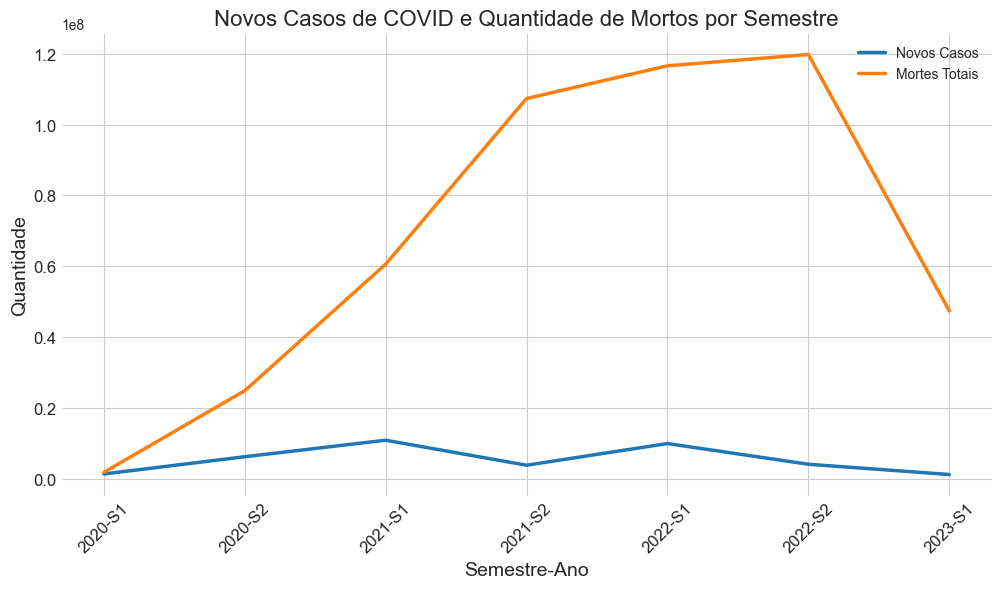

In [446]:
# Função para mapear o mês ao semestre correspondente
def month_to_semester(month):
    return (month - 1) // 6 + 1

# Converter a coluna "mes_ano" para o formato datetime
br_data_grouped['mes_ano'] = pd.to_datetime(br_data_grouped['mes_ano'])

# Adicionar uma coluna "semestre" ao DataFrame
br_data_grouped['semestre'] = br_data_grouped['mes_ano'].dt.month.apply(month_to_semester)

# Agrupar os dados por ano e semestre e calcular a soma dos novos casos e mortes totais
br_data_grouped_semester = br_data_grouped.groupby([br_data_grouped['mes_ano'].dt.year, 'semestre']).agg({'novos_casos': 'sum', 'mortes_totais': 'sum'}).reset_index()
br_data_grouped_semester['semestre_ano'] = br_data_grouped_semester['mes_ano'].astype(str) + "-S" + br_data_grouped_semester['semestre'].astype(str)

# Análise de tendências temporais
fig, ax = plt.subplots(figsize=(12, 6))
sns.lineplot(x='semestre_ano', y="novos_casos", data=br_data_grouped_semester, linewidth=2.5, label="Novos Casos")
sns.lineplot(x='semestre_ano', y="mortes_totais", data=br_data_grouped_semester, linewidth=2.5, label="Mortes Totais")
plt.title("Novos Casos de COVID e Quantidade de Mortos por Semestre", fontsize=16)
plt.xlabel('Semestre-Ano', fontsize=14)
plt.ylabel("Quantidade", fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
ax.legend()
plt.grid(True)
plt.show()


In [447]:
br_data.describe()

,casos_totais,novos_casos,novos_casos_suavizados,mortes_totais,novas_mortes,novas_mortes_suavizadas,casos_totais_por_milhao,novos_casos_por_milhao,novos_casos_suavizados_por_milhao,mortes_totais_por_milhao,...,fumantes_homens,instalacoes_lavagem_maos,leitos_hospitalares_por_mil,expectativa_vida,indice_desenvolvimento_humano,populacao,mortalidade_excessiva_acumulada_absoluta,mortalidade_excessiva_acumulada,mortalidade_excessiva,mortalidade_excessiva_acumulada_por_milhao
count,1.196000e+03,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,1196.000000,...,1.196000e+03,0.0,1.196000e+03,1.196000e+03,1.196000e+03,1196.0,1196.000000,1196.000000,1196.000000,1196.000000
mean,1.870393e+07,31362.444816,31183.758011,426750.387960,586.544314,585.635574,86868.372940,145.659433,144.829556,1981.995509,...,1.790000e+01,NaN,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0,474151.291986,18.103821,18.511714,2206.689832
std,1.320457e+07,33946.750443,29437.570730,265884.419821,722.409352,657.445793,61327.168019,157.661969,136.719574,1234.871053,...,3.554200e-15,NaN,4.442750e-16,1.421680e-14,1.110687e-16,0.0,314300.629597,8.040151,18.602122,1459.316779
min,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.005000,...,1.790000e+01,NaN,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0,-723.700000,-0.650000,-0.650000,-3.394524
25%,5.405922e+06,7876.000000,9176.857500,157331.250000,84.500000,99.535500,25107.215500,36.579000,42.621000,730.707750,...,1.790000e+01,NaN,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0,133819.500000,12.970000,6.770000,627.682070
50%,2.054229e+07,22288.000000,25818.857000,573860.000000,300.000000,324.143000,95406.431500,103.514000,119.913000,2665.230000,...,1.790000e+01,NaN,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0,588347.100000,21.040000,11.990000,2745.101000
75%,3.162000e+07,45020.500000,44727.286000,668730.750000,874.500000,939.000000,146855.640500,209.092500,207.730750,3105.846500,...,1.790000e+01,NaN,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0,771925.560000,24.640000,26.230000,3585.123800
max,3.731925e+07,298408.000000,189526.000000,700556.000000,4249.000000,3123.571000,173325.190000,1385.923000,880.233000,3253.656000,...,1.790000e+01,NaN,2.200000e+00,7.588000e+01,7.650000e-01,215313504.0,836347.750000,27.070000,83.180000,3884.325700


Engenharia de recursos:

Nessa etapa, criamos duas novas colunas para ajudar na análise e na previsão:

'days_since_start': representa o número de dias desde o início da pandemia até a data em questão.
'mortality_rate': representa a taxa de mortalidade, ou seja, o número total de mortes dividido pelo número total de casos.

In [448]:
# Criar a coluna 'dias_desde_inicio'
br_data['date'] = pd.to_datetime(br_data['date'])
br_data['dias_desde_inicio'] = (br_data['date'] - br_data['date'].min()).dt.days

# Criar a coluna 'mortes_diarias_media_movel_7_dias'
br_data['mortes_diarias_media_movel_7_dias'] = br_data['novas_mortes'].rolling(window=7).mean()

# Visualizar as primeiras linhas do conjunto de dados
br_data.head()


,codigo_iso,continente,localizacao,data,casos_totais,novos_casos,novos_casos_suavizados,mortes_totais,novas_mortes,novas_mortes_suavizadas,...,expectativa_vida,indice_desenvolvimento_humano,populacao,mortalidade_excessiva_acumulada_absoluta,mortalidade_excessiva_acumulada,mortalidade_excessiva,mortalidade_excessiva_acumulada_por_milhao,date,dias_desde_inicio,mortes_diarias_media_movel_7_dias
35883,BRA,South America,Brazil,2020-01-03,1.0,0.0,0.0,1.0,0.0,0.0,...,75.88,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-03,0,NaN
35884,BRA,South America,Brazil,2020-01-04,1.0,0.0,0.0,1.0,0.0,0.0,...,75.88,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-04,1,NaN
35885,BRA,South America,Brazil,2020-01-05,1.0,0.0,0.0,1.0,0.0,0.0,...,75.88,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-05,2,NaN
35886,BRA,South America,Brazil,2020-01-06,1.0,0.0,0.0,1.0,0.0,0.0,...,75.88,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-06,3,NaN
35887,BRA,South America,Brazil,2020-01-07,1.0,0.0,0.0,1.0,0.0,0.0,...,75.88,0.765,215313504.0,-723.7,-0.65,-0.65,-3.394524,2020-01-07,4,NaN


In [449]:
br_data.data.max()

'2023-04-12'

In [450]:
br_data['data'] = pd.to_datetime(br_data['data'])
br_data['mes_ano'] = br_data['data'].dt.to_period('M')



In [451]:
br_data['semestre_ano'] = br_data['data'].dt.to_period('Q')

# Ajustar os rótulos dos períodos para refletir o semestre
br_data['semestre_ano'] = br_data['semestre_ano'].apply(lambda x: f"{x.year}-S{1 if x.quarter <= 2 else 2}")


Selecionar características relevantes.

Nesta etapa, selecionamos apenas as colunas que são relevantes para nossa análise e previsão, removendo colunas desnecessárias.

In [452]:
# Selecionar colunas de interesse
selected_columns = ['localizacao', 'data', 'casos_totais', 'novos_casos', 'mortes_totais', 'novas_mortes', 'taxa_reproducao', 'taxa_positividade', 'vacinacoes_totais', 'pessoas_vacinadas', 'pessoas_totalmente_vacinadas', 'densidade_populacional', 'idade_media', 'pib_per_capita', 'prevalencia_diabetes']

# Criar um novo DataFrame com as colunas selecionadas
br_data_selected = br_data[selected_columns]

# Verificar as primeiras linhas do novo DataFrame
print(br_data_selected.head())


      localizacao       data  casos_totais  novos_casos  mortes_totais  \
35883      Brazil 2020-01-03           1.0          0.0            1.0   
35884      Brazil 2020-01-04           1.0          0.0            1.0   
35885      Brazil 2020-01-05           1.0          0.0            1.0   
35886      Brazil 2020-01-06           1.0          0.0            1.0   
35887      Brazil 2020-01-07           1.0          0.0            1.0   

       novas_mortes  taxa_reproducao  taxa_positividade  vacinacoes_totais  \
35883           0.0             2.33                NaN              112.0   
35884           0.0             2.33                NaN              112.0   
35885           0.0             2.33                NaN              112.0   
35886           0.0             2.33                NaN              112.0   
35887           0.0             2.33                NaN              112.0   

       pessoas_vacinadas  pessoas_totalmente_vacinadas  \
35883              112.0    

Nesta etapa, preenchemos os valores ausentes (NaN) com a média dos valores da respectiva coluna. Isso é uma abordagem simples e comum para lidar com dados faltantes, embora outras técnicas possam ser aplicadas.

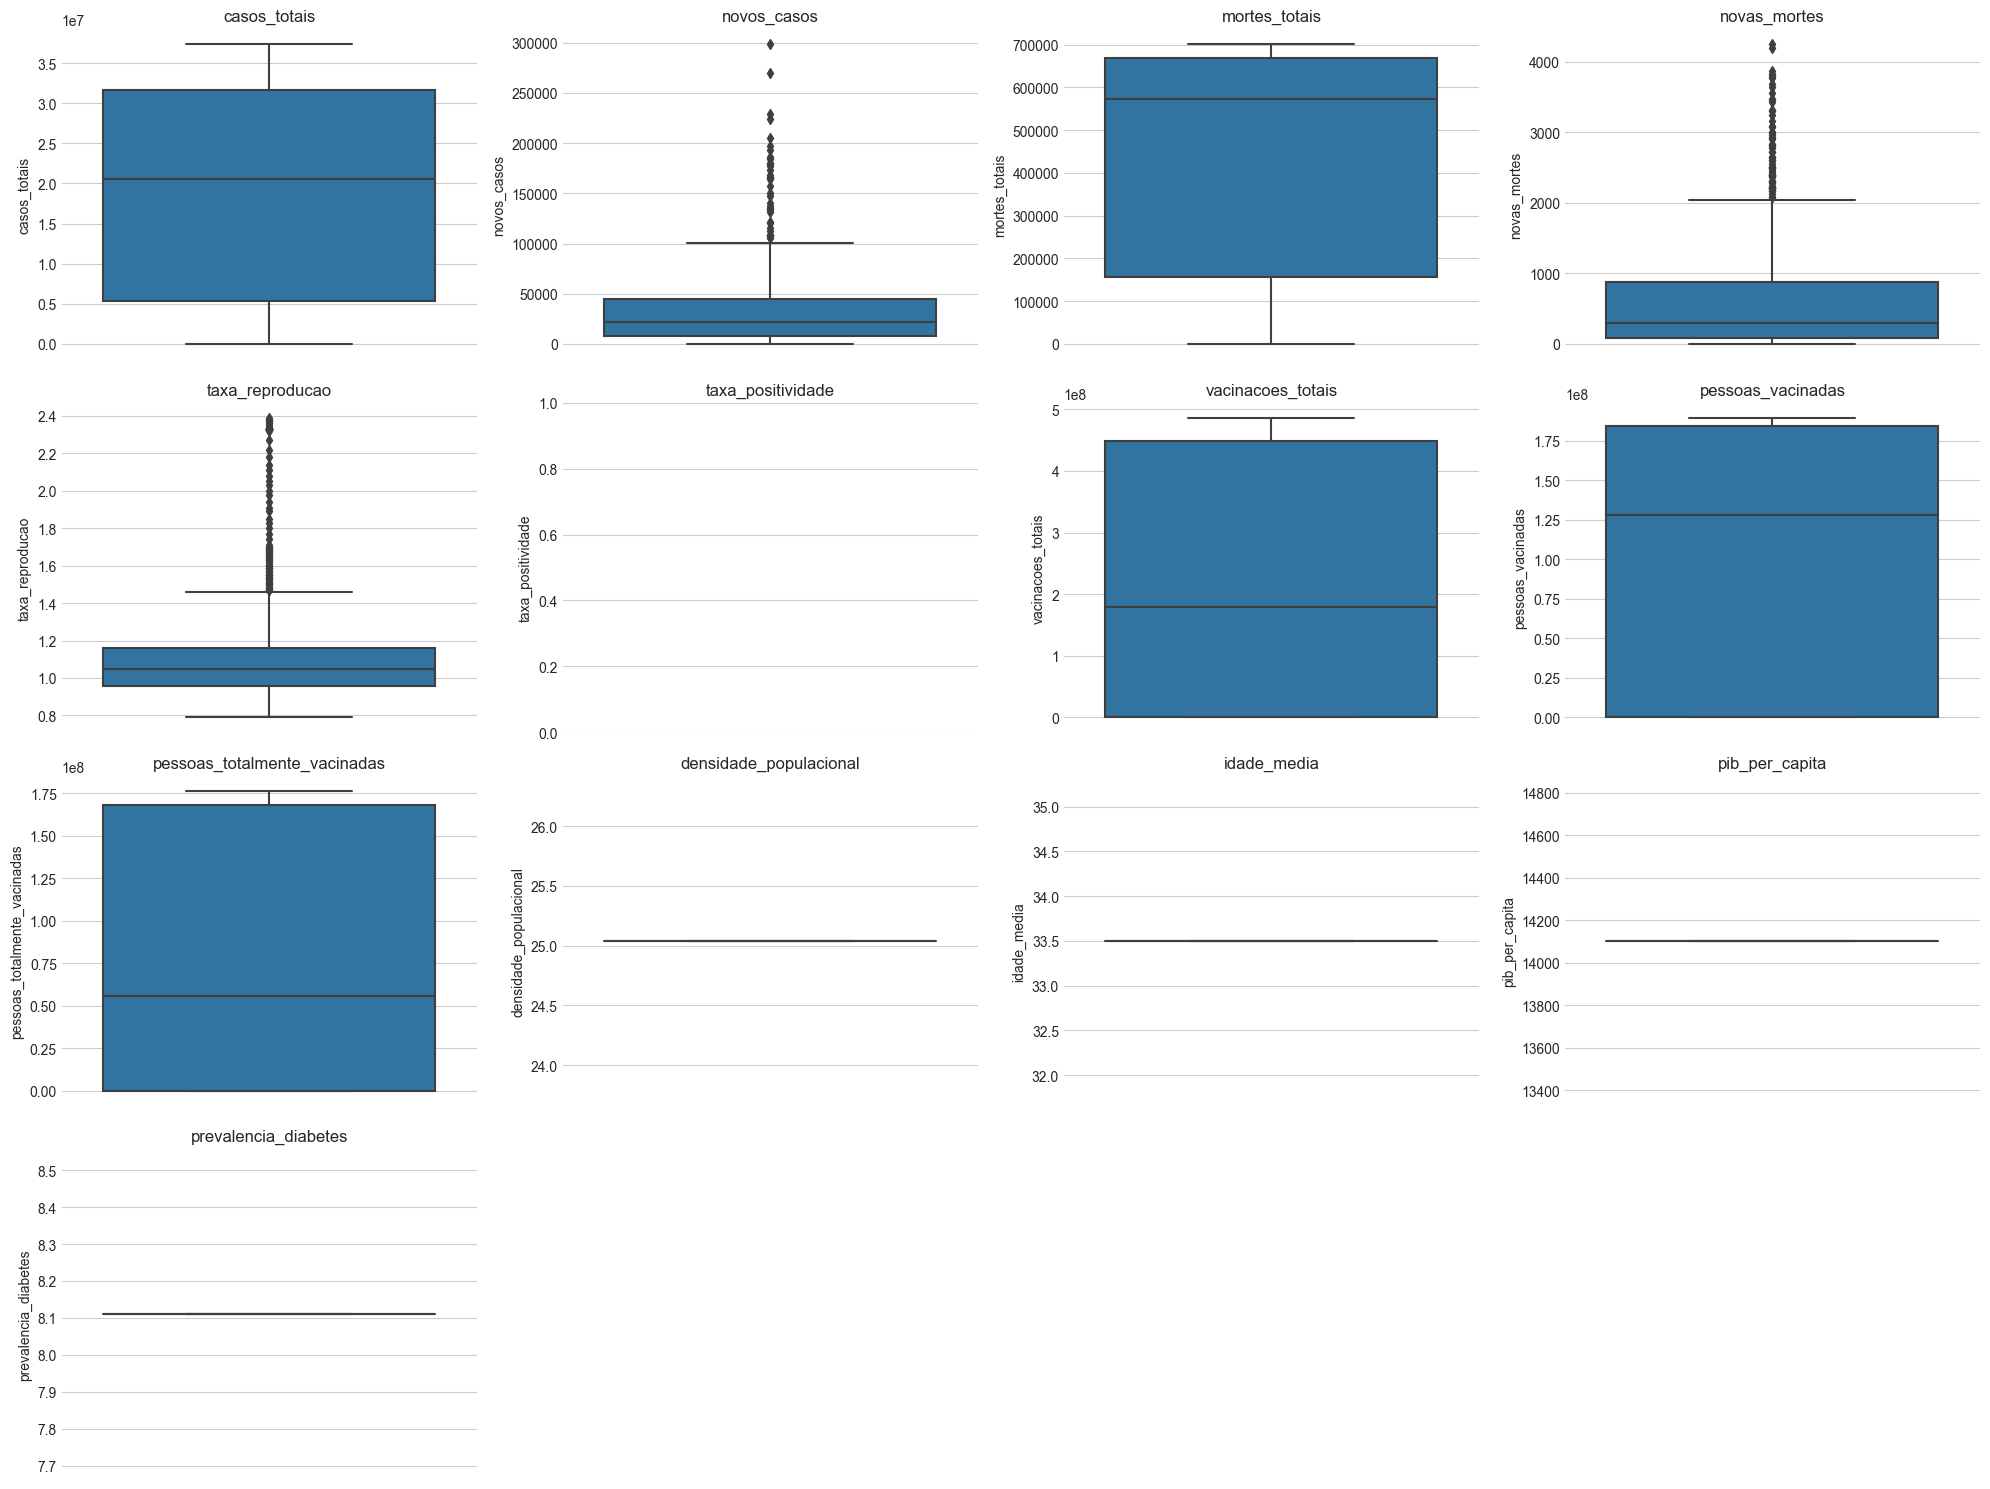

In [453]:


# Lista das colunas numéricas relevantes para o modelo
numerical_columns = ['casos_totais', 'novos_casos', 'mortes_totais', 'novas_mortes', 'taxa_reproducao', 'taxa_positividade', 'vacinacoes_totais', 'pessoas_vacinadas', 'pessoas_totalmente_vacinadas', 'densidade_populacional', 'idade_media', 'pib_per_capita', 'prevalencia_diabetes']

# Configurar o tamanho dos subplots
plt.figure(figsize=(20, 15))

# Gerar boxplots para cada coluna numérica relevante
for i, col in enumerate(numerical_columns):
    plt.subplot(4, 4, i + 1)
    sns.boxplot(data=br_data_selected, y=col)
    plt.title(col)

# Ajustar layout e exibir o gráfico
plt.tight_layout()
plt.show()


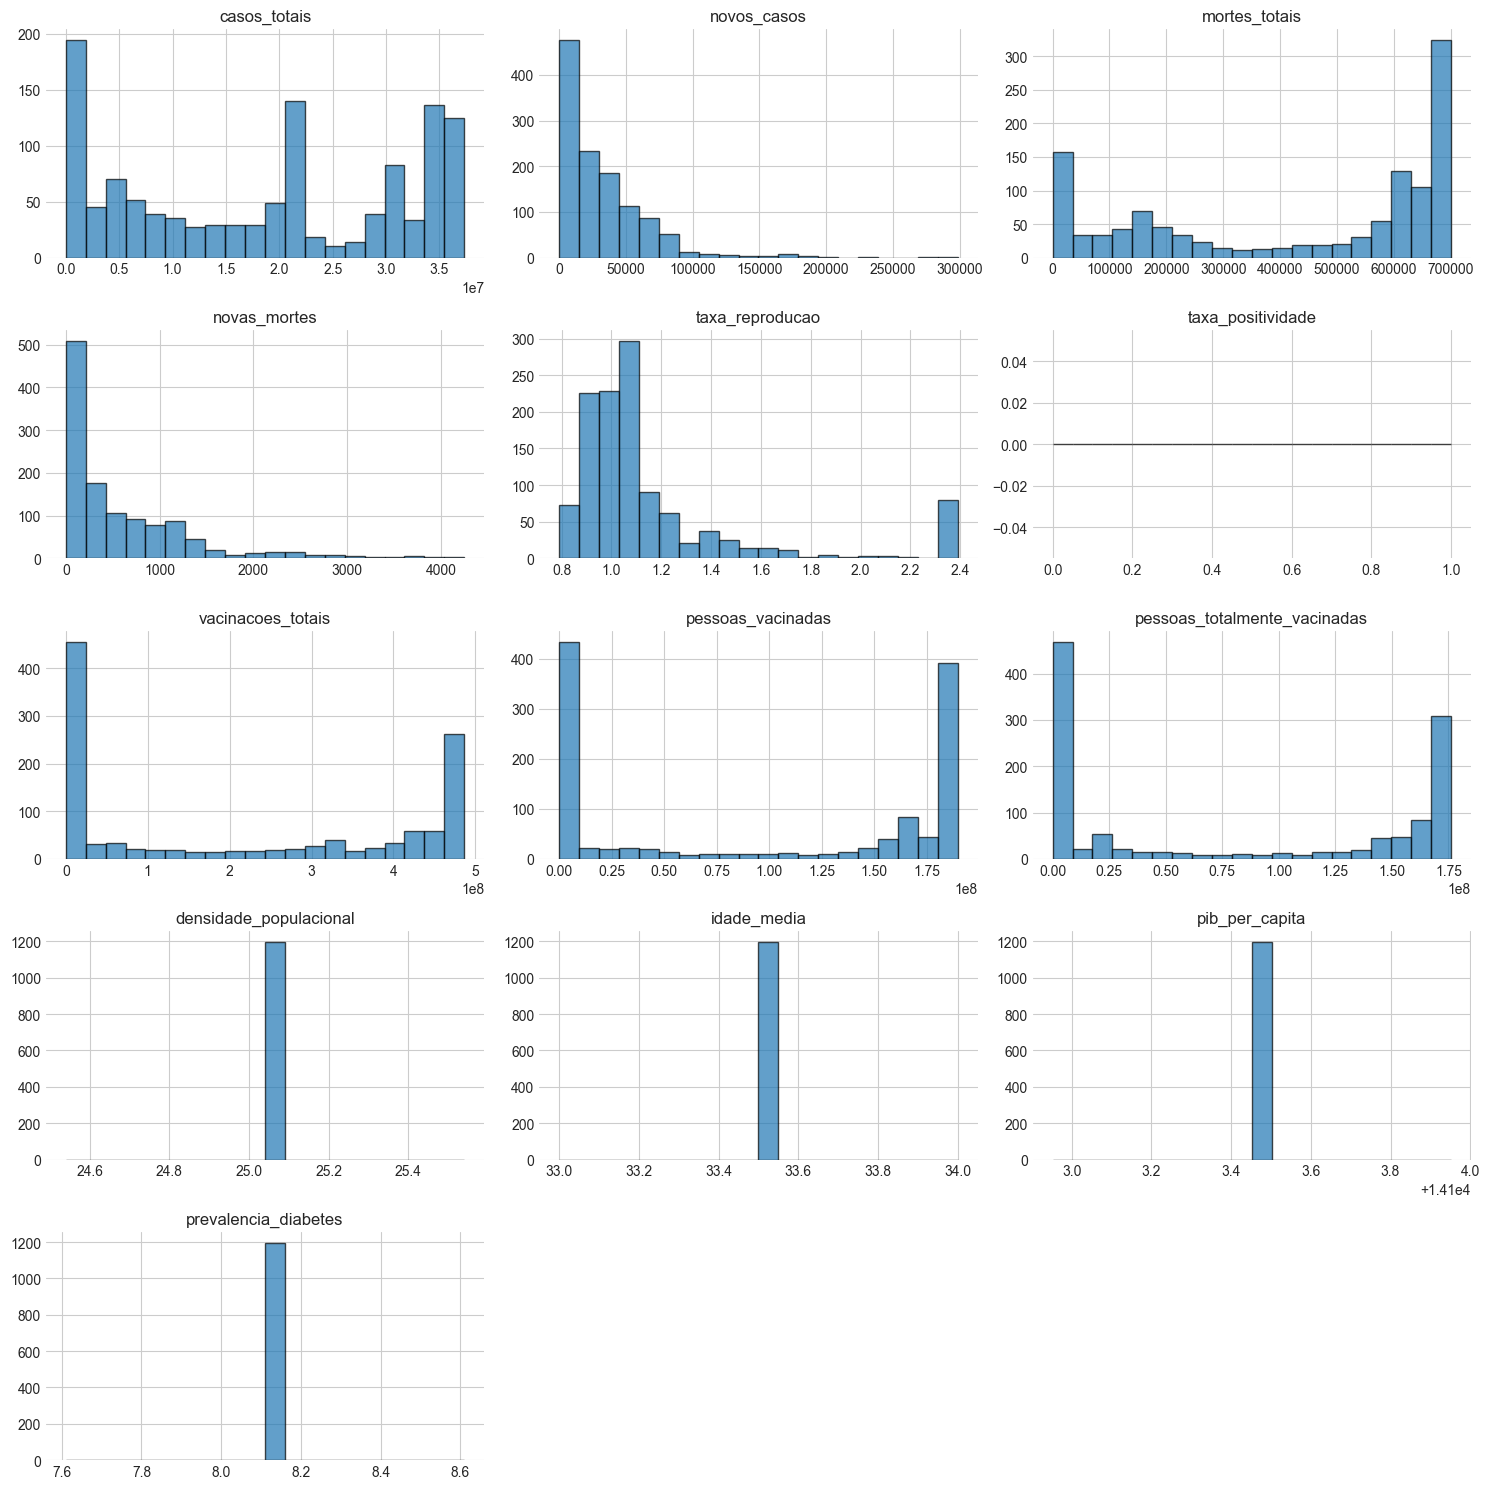

In [454]:
# Definir o estilo dos gráficos
sns.set_style('whitegrid')

# Selecionar colunas de interesse
selected_columns = ['casos_totais', 'novos_casos', 'mortes_totais', 'novas_mortes', 'taxa_reproducao', 'taxa_positividade', 'vacinacoes_totais', 'pessoas_vacinadas', 'pessoas_totalmente_vacinadas', 'densidade_populacional', 'idade_media', 'pib_per_capita', 'prevalencia_diabetes']

# Configurar o número de subplots (número de linhas e colunas)
nrows = int(len(selected_columns) / 3) + 1
ncols = 3

# Criar os histogramas
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
axes = axes.ravel()

# Personalizar cada histograma
for i, col in enumerate(selected_columns):
    br_data[col].hist(ax=axes[i], bins=20, edgecolor='black', alpha=0.7)
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel('')

# Remover os subplots não utilizados
for i in range(len(selected_columns), nrows * ncols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()



In [455]:
br_data.columns

Index(['codigo_iso', 'continente', 'localizacao', 'data', 'casos_totais',
       'novos_casos', 'novos_casos_suavizados', 'mortes_totais',
       'novas_mortes', 'novas_mortes_suavizadas', 'casos_totais_por_milhao',
       'novos_casos_por_milhao', 'novos_casos_suavizados_por_milhao',
       'mortes_totais_por_milhao', 'novas_mortes_por_milhao',
       'novas_mortes_suavizadas_por_milhao', 'taxa_reproducao',
       'pacientes_uti', 'pacientes_uti_por_milhao', 'pacientes_internados',
       'pacientes_internados_por_milhao', 'admissoes_uti_semanais',
       'admissoes_uti_semanais_por_milhao', 'admissoes_hospitalares_semanais',
       'admissoes_hospitalares_semanais_por_milhao', 'testes_totais',
       'novos_testes', 'testes_totais_por_mil', 'novos_testes_por_mil',
       'novos_testes_suavizados', 'novos_testes_suavizados_por_mil',
       'taxa_positividade', 'testes_por_caso', 'unidades_testes',
       'vacinacoes_totais', 'pessoas_vacinadas',
       'pessoas_totalmente_vacinadas', 

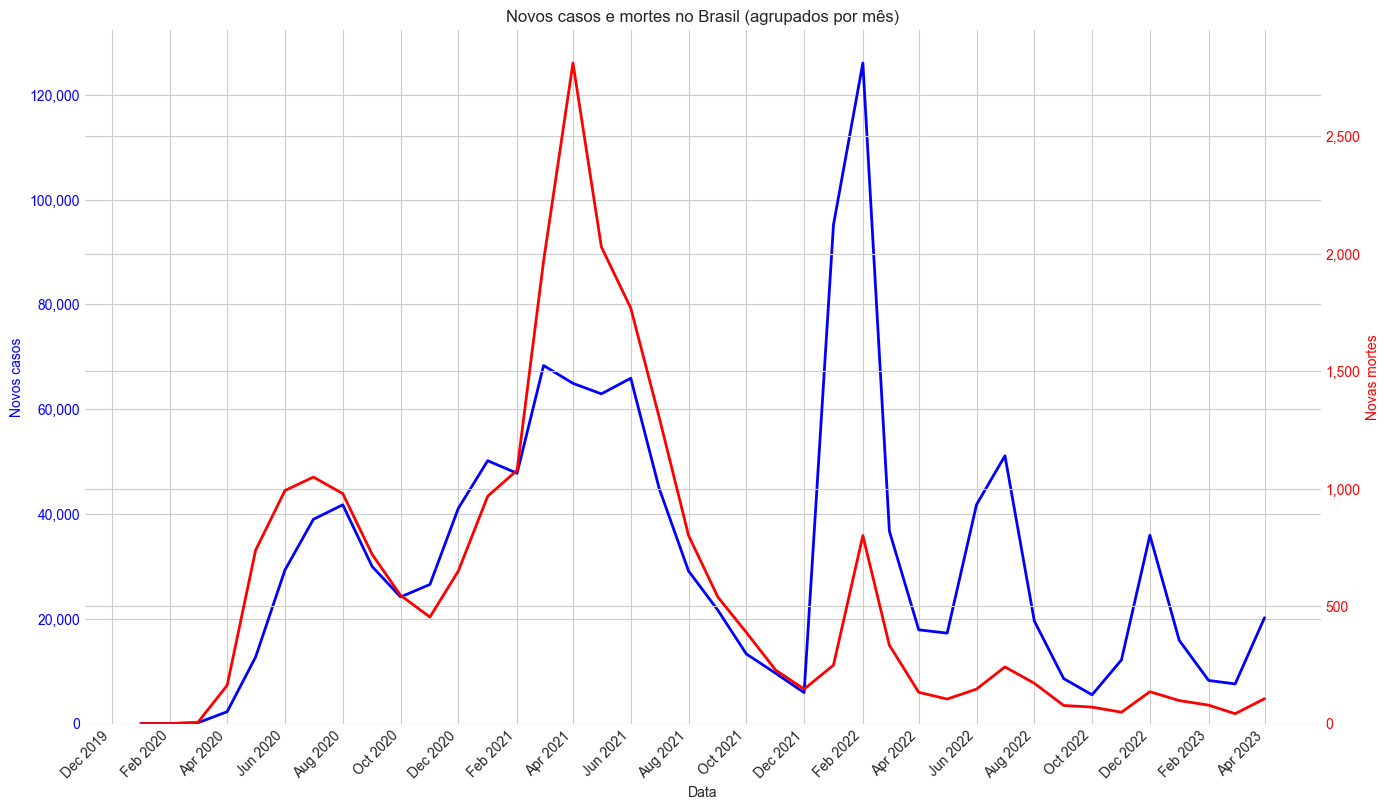

In [456]:
# Converter a coluna "data" para o formato datetime
br_data['data'] = pd.to_datetime(br_data['data'])

# Criando a coluna 'ano_mes'
br_data['ano_mes'] = br_data['data'].dt.to_period('M')

# Agrupando os dados por ano_mes e calculando a média de novos casos e mortes por mês
br_data_monthly = br_data.groupby('ano_mes').agg({'novos_casos': 'mean', 'novas_mortes': 'mean'}).reset_index()

# Converter a coluna 'ano_mes' para datetime (usando o primeiro dia de cada mês)
br_data_monthly['ano_mes'] = br_data_monthly['ano_mes'].apply(lambda x: x.to_timestamp())

fig, ax1 = plt.subplots(figsize=(14, 8))

ax1.plot(br_data_monthly["ano_mes"], br_data_monthly["novos_casos"], label="Novos casos", color="blue", linewidth=2)
ax1.set_xlabel("Data")
ax1.set_ylabel("Novos casos", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(br_data_monthly["ano_mes"], br_data_monthly["novas_mortes"], label="Novas mortes", color="red", linewidth=2)
ax2.set_ylabel("Novas mortes", color="red")
ax2.tick_params(axis="y", labelcolor="red")

# Configurar os intervalos do eixo x
ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=2))  # Intervalos de 2 meses
ax1.xaxis.set_major_formatter(fmt)
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=45, ha='right')  # Rotacionar rótulos

# Melhorar a formatação dos números no eixo y
ax1.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Ajustar limites dos eixos
ax1.set_ylim(bottom=0)
ax2.set_ylim(bottom=0)

fig.tight_layout()
plt.title("Novos casos e mortes no Brasil (agrupados por mês)")
plt.show()





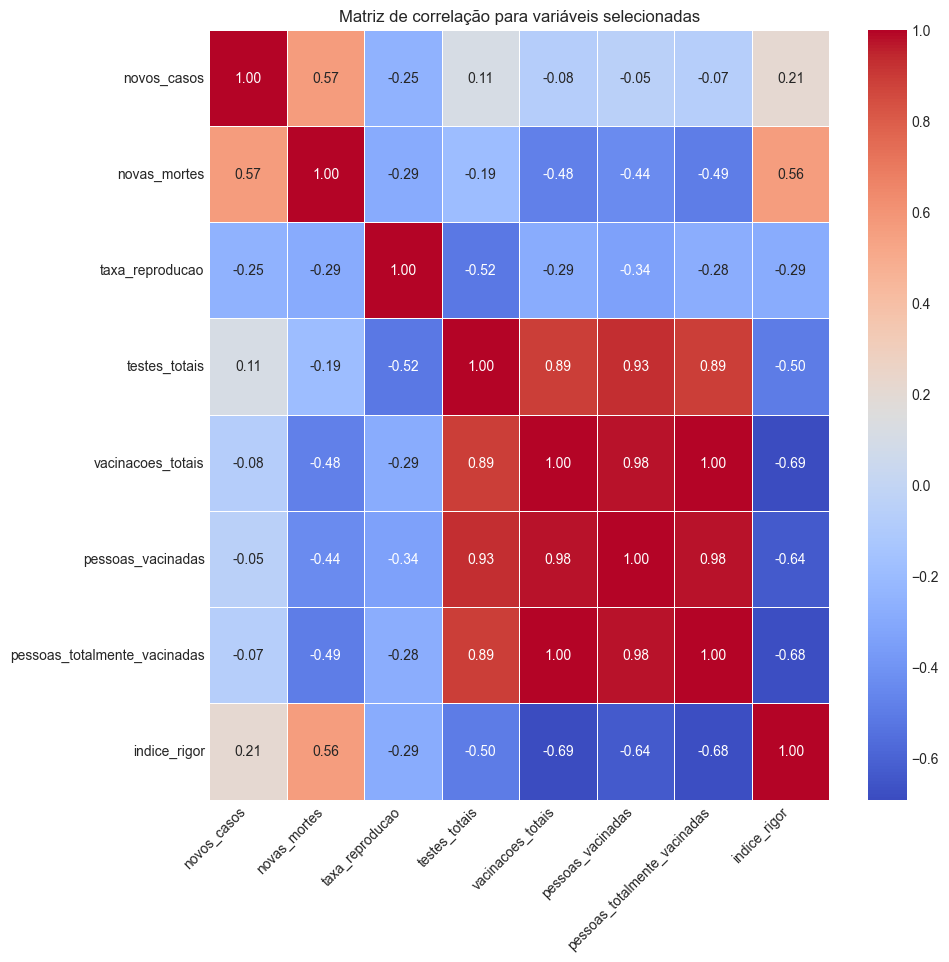

In [457]:
# Selecionar variáveis de interesse
selected_columns = [
    'novos_casos', 'novas_mortes', 'taxa_reproducao', 'testes_totais',
    'vacinacoes_totais', 'pessoas_vacinadas', 'pessoas_totalmente_vacinadas', 'indice_rigor'
]

# Criar matriz de correlação apenas com as variáveis selecionadas
selected_corr_matrix = br_data[selected_columns].corr()

# Plotar a matriz de correlação
plt.figure(figsize=(10, 10))
sns.heatmap(selected_corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5, annot_kws={"size": 10})
plt.title("Matriz de correlação para variáveis selecionadas")
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.show()



In [458]:
# Selecionar as variáveis preditoras e alvo
predictor_columns = [
    'taxa_reproducao', 'pacientes_uti', 'pacientes_internados',
    'testes_totais', 'taxa_positividade', 'vacinacoes_totais',
    'pessoas_vacinadas', 'pessoas_totalmente_vacinadas', 'indice_rigor'
]
target_columns = ['novos_casos', 'novas_mortes']

# Criar um novo conjunto de dados com as variáveis selecionadas
selected_data = br_data[predictor_columns + target_columns]

# Exibir as primeiras linhas do novo conjunto de dados
print(selected_data.head())


       taxa_reproducao  pacientes_uti  pacientes_internados  testes_totais  \
35883             2.33            NaN                   NaN       179698.0   
35884             2.33            NaN                   NaN       179698.0   
35885             2.33            NaN                   NaN       179698.0   
35886             2.33            NaN                   NaN       179698.0   
35887             2.33            NaN                   NaN       179698.0   

       taxa_positividade  vacinacoes_totais  pessoas_vacinadas  \
35883                NaN              112.0              112.0   
35884                NaN              112.0              112.0   
35885                NaN              112.0              112.0   
35886                NaN              112.0              112.0   
35887                NaN              112.0              112.0   

       pessoas_totalmente_vacinadas  indice_rigor  novos_casos  novas_mortes  
35883                        1962.0           0.0      

In [459]:
print("Quantidade de valores ausentes em X_train:")
print(X_train.isna().sum())

Quantidade de valores ausentes em X_train:
taxa_reproducao                   0
pacientes_uti                   956
pacientes_internados            956
testes_totais                     0
taxa_positividade               956
vacinacoes_totais                 0
pessoas_vacinadas                 0
pessoas_totalmente_vacinadas      0
indice_rigor                      0
dtype: int64


In [460]:
#Vou usar o RandomForestRegressor com o seu dataframe. Primeiro, vamos garantir que não haja valores NaN em X_train após aplicar o imputer. Em seguida, treinaremos o RandomForestRegressor e avaliaremos seu desempenho.



# Verificar novamente se há valores NaN em X_train
print("Valores NaN em X_train:", X_train.isna().any())

Valores NaN em X_train: taxa_reproducao                 False
pacientes_uti                    True
pacientes_internados             True
testes_totais                   False
taxa_positividade                True
vacinacoes_totais               False
pessoas_vacinadas               False
pessoas_totalmente_vacinadas    False
indice_rigor                    False
dtype: bool


In [461]:
# Removendo colunas com todos os valores ausentes
X_train_clean = X_train.drop(['pacientes_uti', 'pacientes_internados', 'taxa_positividade'], axis=1)
X_test_clean = X_test.drop(['pacientes_uti', 'pacientes_internados', 'taxa_positividade'], axis=1)

print("Valores NaN em X_train_clean:")
print(X_train_clean.isna().any())


Valores NaN em X_train_clean:
taxa_reproducao                 False
testes_totais                   False
vacinacoes_totais               False
pessoas_vacinadas               False
pessoas_totalmente_vacinadas    False
indice_rigor                    False
dtype: bool


In [462]:
# Ajustar o imputer nos dados de treinamento e aplicá-lo
X_train_imputed = imputer.fit_transform(X_train)

In [463]:
# Aplicar o imputer nos dados de teste
X_test_imputed = imputer.transform(X_test)

In [464]:
# Definindo os parâmetros para busca no GridSearchCV
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [465]:
# Criando o modelo RandomForestRegressor
rf = RandomForestRegressor(random_state=42)


In [466]:
# Criando o objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1)

In [467]:
# Ajustando o GridSearchCV com os dados de treinamento
grid_search.fit(X_train_clean, y_train)


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]})

In [468]:
# Obtendo os melhores parâmetros encontrados
best_params = grid_search.best_params_
print("Melhores parâmetros encontrados:", best_params)

Melhores parâmetros encontrados: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [469]:
# Criando o modelo com os melhores parâmetros encontrados
best_rf = RandomForestRegressor(**best_params, random_state=42)

In [470]:
# Treinando o modelo com os dados de treinamento
best_rf.fit(X_train_clean, y_train)

RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)

In [471]:
# Avaliando a performance do modelo nos dados de teste
y_pred = best_rf.predict(X_test_clean)

In [472]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 16956.743274943157


In [473]:
from sklearn.metrics import r2_score, mean_absolute_error

# Calcular R²
r2 = r2_score(y_test, y_pred)

# Calcular MAE
mae = mean_absolute_error(y_test, y_pred)

# Calcular MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("R²:", r2)
print("MAE:", mae)
print("MAPE:", mape)

R²: 0.7208097141208356
MAE: 6619.537380848013
MAPE: novos_casos     inf
novas_mortes    inf
dtype: float64


C:\Users\thiag\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\numpy\core\fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
